# Тестовое Задание на позицию SRE Data Analyst

## Гайдлайн

Этот документ состоит из 10 заданий, проверяющиx владение инструментами для анализа данных. Время выполнения - примерно 2 часа.


ℹ️ пожалуйста, сделайте копию этой тетради `File -> Save a Copy in Drive` и пришлите нам обратно

ℹ️ добавьте своё имя в название файла: **NAME_SURNAME**`_Ozon SRE Data Analyst Test.ipynb`

ℹ️ не забудьте выставить доступ: `Share -> Anyone on the internet with this link can view`

ℹ️  Используйте SQL для выполнения `Часть 1` и Python для выполнения `Часть 2`

ℹ️ По отправленной вам ссылке, вы так же найдёте файл `part1_ozon_test.db` для первого задания - не забудьте загрузить его сюда 

![](http://i.imgur.com/IfqgWaj.png)

Если во время выполнения появляются вопросы - не их задавать! 

Пишите Давиду в любое время, даже в выходные :)

https://t.me/dzlob

## Подготовка

Before starting the Test Assignment, please **update the sqlite3** library to the latest version with a code below:

In [ ]:
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/
# then MENU: Runtime > Restart runtime ...
import sqlite3
sqlite3.sqlite_version  # 3.34.1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.7M  100 10.7M    0     0  8943k      0  0:00:01  0:00:01 --:--:-- 8943k
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

'3.35.4'

When the library updated (will take 2-3 minutes), please click **Runtime --> Restart Runtime.**

Then, import the libraries and make sure that sqlite version not lower than 3.25.0. has installed.

In [ ]:
import pandas as pd
import sqlite3
current_version = sqlite3.sqlite_version
min_version = '3.25.0'

if current_version < min_version:
    msg = f"current version {current_version} is less than {min_version}, update and restart collab runtime"
    raise ImportError(msg)
else:
    msg = f"current version {current_version} is OK!"
    print(msg)

current version 3.35.4 is OK!


## Часть 1: SQL

Используйте только SQL запросы для выполнения этой части.

Если при выполнении этого занятия у вас возникают сложности, обратитесь к [этому туториалу](https://mode.com/sql-tutorial/)



In [ ]:
con = sqlite3.connect('/content/part1_ozon_test.db')

df_cities = pd.read_sql_query("SELECT * FROM cities", con)
df_cities

,city_name,city_id
0,Moscow,b00ce276-6dcb-40ee-9016-4109c8c7b60f
1,Saint-Petersburg,ffd147fa-150a-4789-8252-39a4eaf3ee12
2,Krasnodar,737ea994-2e23-4f39-b220-5b9216b56147
3,Adler,a2b8c09f-0ede-491b-98ae-b6dbba89abb8
4,Ekaterinburg,642e49e5-afa1-40af-97ae-fd108818def9


### Q1:
`time_to_delivery` - это метрика, которая считает сколько проходит между созданием (`created_at`) и получением заказа (`delivered_at`)

Посчитайте для каждого города средний `time_to_delivery` и отсорируйте их - от худшего к лучшему


In [ ]:
pd.read_sql_query("""

SELECT ROUND(AVG(julianday(delivered_at) - julianday(created_at))) AS time_to_delivery,
(SELECT city_name FROM cities WHERE orders.city_id = cities.city_id) AS city
FROM orders
GROUP BY city
ORDER BY time_to_delivery DESC

""", con)

,time_to_delivery,city
0,3.0,Ekaterinburg
1,3.0,Adler
2,2.0,Saint-Petersburg
3,1.0,Moscow



### Q2: 
А сколько в среднем проходит между тем как пользователь получил первый заказ, и сделал следующий заказ?


In [ ]:
#Возьмем любого юзера с числом заказов > 1 и посмотрим на правилность дат.
#Если случаи, что пользователь не дожидаясь первого заказа - сделал уже второй.
#В общем случае можно считать разницу между получением и созданием заказа. 
#Но если второй заказ сделали, недожидаясь первого - надо добавлять условие в расчет.
pd.read_sql_query("""

SELECT user_id, created_at, delivered_at

FROM orders
WHERE user_id = '13b1f1f3-3b1d-43eb-9836-71918b03a94e'

""", con)

,user_id,created_at,delivered_at
0,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-07 23:29:39,2020-02-09 08:39:57
1,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-09 08:19:32.030576,2020-02-10 07:53:41
2,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-11 13:11:10.501578,2020-02-13 02:37:30
3,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-13 00:15:47.062838,2020-02-14 01:02:26


In [ ]:
#Посчитаем для одного пользователя
pd.read_sql_query("""

SELECT user_id,
    created_at,
    delivered_at,
    next_order,
    (julianday(next_order) - julianday(created_at)) AS time_between_next_order

FROM (SELECT user_id, created_at, delivered_at, LEAD(created_at,1,NULL) OVER(ORDER BY created_at) AS next_order
      FROM orders
      WHERE user_id = '13b1f1f3-3b1d-43eb-9836-71918b03a94e')query_in_1

""", con)

,user_id,created_at,delivered_at,next_order,time_between_next_order
0,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-07 23:29:39,2020-02-09 08:39:57,2020-02-09 08:19:32.030576,1.367975
1,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-09 08:19:32.030576,2020-02-10 07:53:41,2020-02-11 13:11:10.501578,2.202529
2,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-11 13:11:10.501578,2020-02-13 02:37:30,2020-02-13 00:15:47.062838,1.461534
3,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-13 00:15:47.062838,2020-02-14 01:02:26,None,NaN


In [ ]:
#Посчитаем для всех пользователей и добавим AVG
pd.read_sql_query("""

SELECT user_id,
    created_at,
    delivered_at,
    next_order,
    AVG((julianday(next_order) - julianday(created_at))) AS time_between_next_order

FROM (SELECT user_id, created_at, delivered_at, LEAD(created_at,1,NULL) OVER(ORDER BY created_at) AS next_order
      FROM orders)query_in_1
GROUP BY user_id
HAVING COUNT(user_id) > 1

""", con)

,user_id,created_at,delivered_at,next_order,time_between_next_order
0,0289c6fb-8faa-41db-877d-afbd7fd71634,2020-02-05 00:53:24,2020-02-07 06:11:02,2020-02-05 01:45:30,0.021325
1,08590dbf-3524-4fcd-a25d-1f4740c688cb,2020-02-07 12:29:35,2020-02-09 07:27:38,2020-02-07 12:44:57,0.009848
2,090555ee-5d40-4b04-84dd-f552ee4076e5,2020-02-04 05:33:08,2020-02-05 14:12:02,2020-02-04 05:33:42,0.022886
3,0ac95090-362e-4bf7-8c5d-d6e9c36a88c4,2020-02-02 17:39:49,2020-02-03 15:13:59,2020-02-02 17:59:25,0.008113
4,0c741992-45fc-4e6b-9ce8-b57c686dae4b,2020-02-01 10:41:31,2020-02-03 03:07:00,2020-02-01 11:23:59,0.018619
...,...,...,...,...,...
121,f45deeb4-391b-49ad-a777-bc8120931983,2020-02-08 18:30:00.478189,2020-02-09 17:34:40,2020-02-08 18:37:30,0.042801
122,f64d3ec4-0f61-4f00-a9f4-cd1149e645ba,2020-02-02 10:40:47,2020-02-03 17:35:14,2020-02-02 10:46:26,0.024345
123,f73a7b7a-a961-49ca-b23e-c8191306ef1b,2020-02-03 05:02:33,2020-02-04 07:22:52,2020-02-03 08:02:55,0.047118
124,fb35e63b-da01-468f-bc79-596b788aebfb,2020-02-09 04:28:27,2020-02-09 23:59:00,2020-02-09 04:48:09,0.019836


### Q3: 

Посчитайте сколько всего пользователей в Москве имеют средний чек выше 2000 рублей (в % от всех пользователей, у которых был хотя бы один заказ в Москве)


In [ ]:
pd.read_sql_query("""

SELECT user_id,
       AVG(value_rub) as mean_check,
       (SELECT city_name FROM cities WHERE orders.city_id = cities.city_id) AS city
FROM orders
GROUP BY user_id
HAVING AVG(value_rub) > 2000 AND COUNT(user_id) > 1;

""", con)

,user_id,mean_check,city
0,08590dbf-3524-4fcd-a25d-1f4740c688cb,2219.000000,Saint-Petersburg
1,0d8a152d-2bcd-48ff-9683-207824333219,2638.666667,Moscow
2,1bd15840-6862-4eeb-a5ca-d55a4337a91c,2332.000000,Saint-Petersburg
3,2182a16b-25e2-4620-b015-c81756b73f54,2354.750000,Moscow
4,26e11473-23fe-4d60-86ae-1b0ab6199ea4,2001.000000,Moscow
5,2a4cc8f4-86c1-4551-976b-5f25e98487da,2211.666667,Saint-Petersburg
6,2ab77942-80fc-4f0e-91c0-82a312577e69,2028.500000,Saint-Petersburg
7,36f571c8-72b2-471f-ba36-831cad9064a6,2401.500000,Moscow
8,3974dc62-5c2a-4a1f-a118-d7242a4c61a6,2021.333333,Moscow
9,3c4504a3-c8f2-44fa-9fff-b37d53368cb9,2207.750000,Moscow


In [ ]:
part = pd.read_sql_query("""    
SELECT SUM(users_mean_check_above_2k) as part
FROM
(SELECT COUNT(DISTINCT user_id) as users_mean_check_above_2k
FROM orders
GROUP BY user_id
HAVING AVG(value_rub) > 2000 AND COUNT(user_id) > 1) as some

""", con)

all = pd.read_sql_query("""    

SELECT COUNT(user_id) as all_
FROM orders
""", con)

In [ ]:
f'{round(part.values.tolist()[0][0] / (all.values.tolist()[0][0] / 100),1)}% пользователей в Москве имеют средний чек выше 2000 рублей'

'7.4% пользователей в Москве имеют средний чек выше 2000 рублей'


### Q4:
Посчитайте сколько часов в среднем проходит между заказами одного и того же пользователя?

In [ ]:
#Посчитаем каждый заказ
pd.read_sql_query("""

SELECT user_id,
    created_at,
    delivered_at,
    next_order,
    (julianday(next_order) - julianday(created_at))*24 AS time_between_next_order

FROM (SELECT user_id, created_at, delivered_at, LEAD(created_at,1,NULL) OVER(ORDER BY created_at) AS next_order
      FROM orders
      WHERE user_id = '13b1f1f3-3b1d-43eb-9836-71918b03a94e')query_in_1

""", con)

,user_id,created_at,delivered_at,next_order,time_between_next_order
0,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-07 23:29:39,2020-02-09 08:39:57,2020-02-09 08:19:32.030576,32.831397
1,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-09 08:19:32.030576,2020-02-10 07:53:41,2020-02-11 13:11:10.501578,52.860686
2,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-11 13:11:10.501578,2020-02-13 02:37:30,2020-02-13 00:15:47.062838,35.076823
3,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-13 00:15:47.062838,2020-02-14 01:02:26,None,NaN


In [ ]:
#Найдем среднее
pd.read_sql_query("""

SELECT user_id,
    created_at,
    delivered_at,
    next_order,
    AVG((julianday(next_order) - julianday(created_at))*24) AS time_between_next_order

FROM (SELECT user_id, created_at, delivered_at, LEAD(created_at,1,NULL) OVER(ORDER BY created_at) AS next_order
      FROM orders
      WHERE user_id = '13b1f1f3-3b1d-43eb-9836-71918b03a94e')query_in_1
GROUP BY user_id

""", con)

,user_id,created_at,delivered_at,next_order,time_between_next_order
0,13b1f1f3-3b1d-43eb-9836-71918b03a94e,2020-02-07 23:29:39,2020-02-09 08:39:57,2020-02-09 08:19:32.030576,40.256302



## Часть 2: requests & pandas

Вторая часть проверяет владение `requests`, `pandas` и навыки визуализации

* для q5, q6 исползуйте модуль `requests`
* для q8, q9 используйте `pandas`
* для q7 используйте любую библиотеку визаулизации на ваш выбор. Я советую `altair` или `plotly`

Перед выполнением задания пройдите requests quickstart
*   http://bit.ly/2KoI43m

Мы будем пользоваться общедоступным REST API для тестирования: https://randomuser.me/api/

Это API endpoint, который возвращает случайно сгенерированно пользователя.



### Q5 

Скачайте и красиво распечатайте результат для случайного пользователя 

(подсказка: пользуйтесь GET методом)

In [ ]:
import requests
import pprint
r = requests.get('https://randomuser.me/api/')

pprint.pprint(r.json())


{'info': {'page': 1,
          'results': 1,
          'seed': 'd02e51f632f90d15',
          'version': '1.3'},
 'results': [{'cell': '(17) 8256-1625',
              'dob': {'age': 32, 'date': '1989-02-09T12:41:12.256Z'},
              'email': 'darciela.goncalves@example.com',
              'gender': 'female',
              'id': {'name': '', 'value': None},
              'location': {'city': 'Pouso Alegre',
                           'coordinates': {'latitude': '-69.5146',
                                           'longitude': '56.1562'},
                           'country': 'Brazil',
                           'postcode': 72023,
                           'state': 'Bahia',
                           'street': {'name': 'Rua São Paulo ', 'number': 9943},
                           'timezone': {'description': 'Kathmandu',
                                        'offset': '+5:45'}},
              'login': {'md5': 'bafd87a432b6eac11a83c3f80d2e2904',
                        'password': 

### Q6

Однако, для предсказумых результатов можно передавать в запрос параметр `seed`. Тогда всегда будет возвращаться один и тот же пользователь, например:

* seed `65bfda4df705bed3` всегда возвращает Selma Mаdsen, 61 год
* seed `1f6bcdddf53702b0` всегда будет возвращать Deivid Barros из Бразилии

Мы подготовили для вас 20 сидов, ваша задача:

1. Скачать 20 пользователей с вышеуказанными сидами
2. положить их в pd.DataFrame в удобном виде. Должно получиться примерно так:

![](http://i.imgur.com/cS0Ma69.png)



In [ ]:
random_seeds = ['39c74702ac1bc239', '4c704ac2e3bafcd0', 'bb4fb271a935393b',
 'f1aa6e19de4c5f35', 'f62795d3059338ca', 'a72f8ae890ef4b40', '7fd112b2157130ed',
 'cc871caae4b8b48f', '58dcbce92a0a001a', 'b1942240f0ca789a', '3319a0fc434de151',
 '93c3d966089ee076', '1a04f96f90069e18', '8a7a8ed9a429df61', '85675308636fbe7e',
 'e232bf0460d651e3', '937867e6ea5d9edb', '349e4916c919edbb', 'c230b20320c3f59f',
 'fed1ecb439e22534']

In [ ]:
import requests
import pprint
import json
df = pd.DataFrame()
url = 'https://randomuser.me/api/?seed='

for seed in random_seeds:
  r = requests.get(f'{url}{seed}')
  print(f'Getting values from : {url}{seed}')
  pars = r.json()
  row = pars['results'][0]
  df_row = pd.DataFrame.from_dict(data=row,orient='index').T
  df = pd.concat([df, df_row])

df

Getting values from : https://randomuser.me/api/?seed=39c74702ac1bc239
Getting values from : https://randomuser.me/api/?seed=4c704ac2e3bafcd0
Getting values from : https://randomuser.me/api/?seed=bb4fb271a935393b
Getting values from : https://randomuser.me/api/?seed=f1aa6e19de4c5f35
Getting values from : https://randomuser.me/api/?seed=f62795d3059338ca
Getting values from : https://randomuser.me/api/?seed=a72f8ae890ef4b40
Getting values from : https://randomuser.me/api/?seed=7fd112b2157130ed
Getting values from : https://randomuser.me/api/?seed=cc871caae4b8b48f
Getting values from : https://randomuser.me/api/?seed=58dcbce92a0a001a
Getting values from : https://randomuser.me/api/?seed=b1942240f0ca789a
Getting values from : https://randomuser.me/api/?seed=3319a0fc434de151
Getting values from : https://randomuser.me/api/?seed=93c3d966089ee076
Getting values from : https://randomuser.me/api/?seed=1a04f96f90069e18
Getting values from : https://randomuser.me/api/?seed=8a7a8ed9a429df61
Gettin

,gender,name,location,email,login,dob,registered,phone,cell,id,picture,nat
0,male,"{'title': 'Mr', 'first': 'Sean', 'last': 'Weav...","{'street': {'number': 9198, 'name': 'Shady Ln ...",sean.weaver@example.com,{'uuid': 'dfaeb64c-3da9-4034-81ad-c79b109fea54...,"{'date': '1971-03-01T16:58:27.808Z', 'age': 50}","{'date': '2012-12-15T22:38:17.124Z', 'age': 9}",(006)-996-3299,(851)-950-2650,"{'name': 'SSN', 'value': '127-72-5172'}",{'large': 'https://randomuser.me/api/portraits...,US
0,female,"{'title': 'Ms', 'first': 'Esma', 'last': 'Akay...","{'street': {'number': 9917, 'name': 'Tunalı Hi...",esma.akaydin@example.com,{'uuid': '50c0fa55-861e-4dbd-9eed-a47ec794ffe3...,"{'date': '1971-02-08T13:52:18.887Z', 'age': 50}","{'date': '2018-07-20T21:57:31.950Z', 'age': 3}",(462)-999-1358,(984)-193-4509,"{'name': '', 'value': None}",{'large': 'https://randomuser.me/api/portraits...,TR
0,male,"{'title': 'Mr', 'first': 'Frederick', 'last': ...","{'street': {'number': 1325, 'name': 'Stanley R...",frederick.burton@example.com,{'uuid': '51d2ceed-89a0-4907-8d8f-0fa5df273be8...,"{'date': '1997-08-02T23:36:34.982Z', 'age': 24}","{'date': '2013-03-24T14:42:10.809Z', 'age': 8}",025 7451 6765,0709-993-596,"{'name': 'NINO', 'value': 'EW 63 89 98 W'}",{'large': 'https://randomuser.me/api/portraits...,GB
0,male,"{'title': 'Mr', 'first': 'Leo', 'last': 'Reid'}","{'street': {'number': 6382, 'name': 'Lone Wolf...",leo.reid@example.com,{'uuid': '9b7a7d64-d990-416b-b567-58b29a4bed0c...,"{'date': '1974-08-23T16:35:53.293Z', 'age': 47}","{'date': '2015-04-09T04:00:28.050Z', 'age': 6}",05-6279-8077,0433-167-595,"{'name': 'TFN', 'value': '893884918'}",{'large': 'https://randomuser.me/api/portraits...,AU
0,male,"{'title': 'Monsieur', 'first': 'Theo', 'last':...","{'street': {'number': 4855, 'name': 'Rue Cyrus...",theo.pierre@example.com,{'uuid': 'edd77fdb-9795-4274-9e95-408a423408b1...,"{'date': '1946-06-03T05:15:29.925Z', 'age': 75}","{'date': '2011-04-14T18:40:27.717Z', 'age': 10}",075 230 57 08,077 278 75 86,"{'name': 'AVS', 'value': '756.2224.9087.69'}",{'large': 'https://randomuser.me/api/portraits...,CH
0,male,"{'title': 'Mr', 'first': 'Davut', 'last': 'Akı...","{'street': {'number': 8165, 'name': 'Tunalı Hi...",davut.akisik@example.com,{'uuid': '410daeba-1b70-4f60-a2a5-543c7f1952ec...,"{'date': '1958-07-29T12:04:28.589Z', 'age': 63}","{'date': '2006-07-29T17:12:29.932Z', 'age': 15}",(491)-531-9734,(688)-913-1725,"{'name': '', 'value': None}",{'large': 'https://randomuser.me/api/portraits...,TR
0,female,"{'title': 'Mrs', 'first': 'Johanne', 'last': '...","{'street': {'number': 3467, 'name': 'Brinken'}...",johanne.andersen@example.com,{'uuid': '605551d0-e9b0-47e7-b317-1bbda214ca19...,"{'date': '1982-10-15T02:08:49.879Z', 'age': 39}","{'date': '2017-01-31T03:48:53.397Z', 'age': 4}",10376164,16110248,"{'name': 'CPR', 'value': '151082-5455'}",{'large': 'https://randomuser.me/api/portraits...,DK
0,female,"{'title': 'Mrs', 'first': 'Sara', 'last': 'Kel...","{'street': {'number': 8628, 'name': 'Park Road...",sara.kelley@example.com,{'uuid': 'd78bd98d-8692-492b-b560-7e8fd7b558eb...,"{'date': '1973-01-20T22:51:17.113Z', 'age': 48}","{'date': '2019-06-06T00:15:30.708Z', 'age': 2}",013873 68102,0777-628-262,"{'name': 'NINO', 'value': 'NZ 30 68 67 W'}",{'large': 'https://randomuser.me/api/portraits...,GB
0,female,"{'title': 'Mrs', 'first': 'Violet', 'last': 'H...","{'street': {'number': 690, 'name': 'W Gray St'...",violet.hawkins@example.com,{'uuid': 'f6761eec-fd07-4129-9ba0-506df564d53b...,"{'date': '1965-09-25T02:25:22.207Z', 'age': 56}","{'date': '2016-09-12T15:32:24.145Z', 'age': 5}",03-3283-1701,0407-924-296,"{'name': 'TFN', 'value': '182009894'}",{'large': 'https://randomuser.me/api/portraits...,AU
0,male,"{'title': 'Mr', 'first': 'Ted', 'last': 'Hopki...","{'street': {'number': 4009, 'name': 'Broadway'...",ted.hopkins@example.com,{'uuid': 'e676021c-2b00-452e-97d6-c3174857b317...,"{'date': '1955-12-02T22:33:51.051Z', 'age': 66}","{'date': '2004-01-19T16:22:30.444Z

### Q7

Теперь сделайте два графика как на картинке:

- цвет соответствует гендеру пользователя
- первый график показывает соотношение f-m в штуках, второй - в процентах
- не обязательно повторять 1-в-1, главное - передать смысл

![](http://i.imgur.com/8vyGnXR.png)

Популярные библиотеки для визуализации:

- altair
- plotly
- seaborn

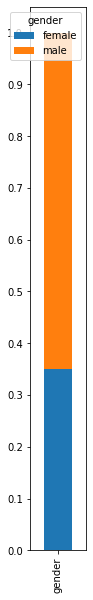

In [ ]:
ax = df.groupby('gender') \
.agg({'gender':'count'}) \
.apply(lambda x: x / len(df)) \
.T \
.plot(kind='bar', stacked=True, figsize=(1,10))
#ax.set_yticklabels(labels="Count of Records",rotation=90)
#ax.set_xlabel()
ax.set_yticks(np.arange(0, 1.1, 0.1))

In [ ]:
#Можно еще так
plot_df = df.groupby('gender') \
.agg({'gender':'count'}) \
.apply(lambda x: x / len(df)) \
.T

import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='female', x=plot_df.female),
    go.Bar(name='male', x=plot_df.male)])

fig.update_layout(barmode='stack')


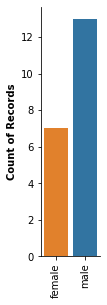

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

#Должно работать, но почему-то не добавляет на рисунок оба графика :(
# fig = plt.figure()

# ax1 = fig.add_subplot(121)
# sns.catplot(x="gender", hue='gender',order=order_list,  kind = 'count', data=df,dodge=False, height=4, aspect=.35, ax=ax1)

# ax2 = fig.add_subplot(122)
# sns.catplot(x="gender", hue='gender',order=order_list,  kind = 'count', data=df,dodge=False, height=4, aspect=.35, ax=ax2)
order_list = ['female','male']
ax = sns.catplot(x="gender", hue='gender',order=order_list,  kind = 'count', data=df,dodge=False, height=4, aspect=.35)

ax.set_xticklabels(rotation=90)
ax.set_xlabels('')
ax.set_ylabels('Count of Records', weight='bold')

In [ ]:
df

,gender,name,location,email,login,dob,registered,phone,cell,id,picture,nat
0,male,"{'title': 'Mr', 'first': 'Sean', 'last': 'Weav...","{'street': {'number': 9198, 'name': 'Shady Ln ...",sean.weaver@example.com,{'uuid': 'dfaeb64c-3da9-4034-81ad-c79b109fea54...,"{'date': '1971-03-01T16:58:27.808Z', 'age': 50}","{'date': '2012-12-15T22:38:17.124Z', 'age': 9}",(006)-996-3299,(851)-950-2650,"{'name': 'SSN', 'value': '127-72-5172'}",{'large': 'https://randomuser.me/api/portraits...,US
0,female,"{'title': 'Ms', 'first': 'Esma', 'last': 'Akay...","{'street': {'number': 9917, 'name': 'Tunalı Hi...",esma.akaydin@example.com,{'uuid': '50c0fa55-861e-4dbd-9eed-a47ec794ffe3...,"{'date': '1971-02-08T13:52:18.887Z', 'age': 50}","{'date': '2018-07-20T21:57:31.950Z', 'age': 3}",(462)-999-1358,(984)-193-4509,"{'name': '', 'value': None}",{'large': 'https://randomuser.me/api/portraits...,TR
0,male,"{'title': 'Mr', 'first': 'Frederick', 'last': ...","{'street': {'number': 1325, 'name': 'Stanley R...",frederick.burton@example.com,{'uuid': '51d2ceed-89a0-4907-8d8f-0fa5df273be8...,"{'date': '1997-08-02T23:36:34.982Z', 'age': 24}","{'date': '2013-03-24T14:42:10.809Z', 'age': 8}",025 7451 6765,0709-993-596,"{'name': 'NINO', 'value': 'EW 63 89 98 W'}",{'large': 'https://randomuser.me/api/portraits...,GB
0,male,"{'title': 'Mr', 'first': 'Leo', 'last': 'Reid'}","{'street': {'number': 6382, 'name': 'Lone Wolf...",leo.reid@example.com,{'uuid': '9b7a7d64-d990-416b-b567-58b29a4bed0c...,"{'date': '1974-08-23T16:35:53.293Z', 'age': 47}","{'date': '2015-04-09T04:00:28.050Z', 'age': 6}",05-6279-8077,0433-167-595,"{'name': 'TFN', 'value': '893884918'}",{'large': 'https://randomuser.me/api/portraits...,AU
0,male,"{'title': 'Monsieur', 'first': 'Theo', 'last':...","{'street': {'number': 4855, 'name': 'Rue Cyrus...",theo.pierre@example.com,{'uuid': 'edd77fdb-9795-4274-9e95-408a423408b1...,"{'date': '1946-06-03T05:15:29.925Z', 'age': 75}","{'date': '2011-04-14T18:40:27.717Z', 'age': 10}",075 230 57 08,077 278 75 86,"{'name': 'AVS', 'value': '756.2224.9087.69'}",{'large': 'https://randomuser.me/api/portraits...,CH
0,male,"{'title': 'Mr', 'first': 'Davut', 'last': 'Akı...","{'street': {'number': 8165, 'name': 'Tunalı Hi...",davut.akisik@example.com,{'uuid': '410daeba-1b70-4f60-a2a5-543c7f1952ec...,"{'date': '1958-07-29T12:04:28.589Z', 'age': 63}","{'date': '2006-07-29T17:12:29.932Z', 'age': 15}",(491)-531-9734,(688)-913-1725,"{'name': '', 'value': None}",{'large': 'https://randomuser.me/api/portraits...,TR
0,female,"{'title': 'Mrs', 'first': 'Johanne', 'last': '...","{'street': {'number': 3467, 'name': 'Brinken'}...",johanne.andersen@example.com,{'uuid': '605551d0-e9b0-47e7-b317-1bbda214ca19...,"{'date': '1982-10-15T02:08:49.879Z', 'age': 39}","{'date': '2017-01-31T03:48:53.397Z', 'age': 4}",10376164,16110248,"{'name': 'CPR', 'value': '151082-5455'}",{'large': 'https://randomuser.me/api/portraits...,DK
0,female,"{'title': 'Mrs', 'first': 'Sara', 'last': 'Kel...","{'street': {'number': 8628, 'name': 'Park Road...",sara.kelley@example.com,{'uuid': 'd78bd98d-8692-492b-b560-7e8fd7b558eb...,"{'date': '1973-01-20T22:51:17.113Z', 'age': 48}","{'date': '2019-06-06T00:15:30.708Z', 'age': 2}",013873 68102,0777-628-262,"{'name': 'NINO', 'value': 'NZ 30 68 67 W'}",{'large': 'https://randomuser.me/api/portraits...,GB
0,female,"{'title': 'Mrs', 'first': 'Violet', 'last': 'H...","{'street': {'number': 690, 'name': 'W Gray St'...",violet.hawkins@example.com,{'uuid': 'f6761eec-fd07-4129-9ba0-506df564d53b...,"{'date': '1965-09-25T02:25:22.207Z', 'age': 56}","{'date': '2016-09-12T15:32:24.145Z', 'age': 5}",03-3283-1701,0407-924-296,"{'name': 'TFN', 'value': '182009894'}",{'large': 'https://randomuser.me/api/portraits...,AU
0,male,"{'title': 'Mr', 'first': 'Ted', 'last': 'Hopki...","{'street': {'number': 4009, 'name': 'Broadway'...",ted.hopkins@example.com,{'uuid': 'e676021c-2b00-452e-97d6-c3174857b317...,"{'date': '1955-12-02T22:33:51.051Z', 'age': 66}","{'date': '2004-01-19T16:22:30.444Z

### Q8 

Найдите самого старого пользователя.

* Как его/её зовут?
* Посчитайте его/её точный возраст на **момент регистрации** в **количестве дней**

In [ ]:
df['age'] = df.dob.apply(lambda x: x['age'])

df['dob'] = df.dob.apply(lambda x: x['date'])
df['dob'] = pd.to_datetime(df.dob, utc=True)

df['registered_date'] = df.registered.apply(lambda x: x['date'])
df['registered_date'] = pd.to_datetime(df.registered_date, utc=True)

df['registered_age'] = df.registered.apply(lambda x: x['age'])

import datetime as dt
max_age = df.age.max()
oldest_person_name = df.query('age == @max_age').name.apply(lambda x:x['title']).values
days_of_life_from_reg = (df.query('age == @max_age').registered_date - df.query('age == @max_age').dob).dt.days.values
print(f'Как его/её зовут? {oldest_person_name} \nПосчитайте его/её точный возраст на момент регистрации в количестве дней {days_of_life_from_reg}')

### Q9

используя `pd.DataFrame.groupby`, посчитайте:
* для мужчин VS женщин
    * их количество
    * средний возраст
    * стандартное отклонениe возраста
    * среднее кол-во лет с момента регистрации
    * стандартное отклонениe кол-вa лет с момента регистрации

In [ ]:
df = df.assign(dif_age_and_reg_age = df.age - df.registered_age)

mean_data = df.groupby('gender', as_index=False).agg(gender=('gender','count'),
                                         mean_age=('age','mean'),
                                         sd_age=('age','std'),
                                         mean_age_dif=('dif_age_and_reg_age','mean'),
                                         sd_age_dif=('dif_age_and_reg_age','std'))
mean_data

### Q10

 Удалите всех пользователей, зарегестрированных раньше 2012 или после 2018
 
 Выражаясь математически, оставьте только промежуток `[2012, 2018)`

In [ ]:
period_start = pd.to_datetime("2012-01-01 00:00:00").tz_localize('UTC')
period_end = pd.to_datetime("2018-01-01 00:00:00").tz_localize('UTC')

df.query('registered_date > @period_start & registered_date <=  @period_end')